## Setup

In [1]:
%run setup.ipynb
%matplotlib inline
import hapclust
import cartopy; print('cartopy', cartopy.__version__)
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import numpy as np
import pickle as peterpickedapickledpepper

cartopy 0.15.1


In [2]:
df_samples = phase1_ar3.df_samples
df_samples.columns

Index(['ox_code', 'src_code', 'sra_sample_accession', 'population', 'country',
       'region', 'contributor', 'contact', 'year', 'm_s', 'sex', 'n_sequences',
       'mean_coverage', 'latitude', 'longitude', 'kt_2la', 'kt_2rb',
       'kdr_1014', 'rdl_296', 'f_roh_100kb', 'count_roh_100kb',
       'sum_roh_100kb', 'pca_3R_free_pc1', 'pca_3R_free_pc2',
       'pca_3R_free_pc3', 'pca_3R_free_pc4', 'pca_3L_free_pc1',
       'pca_3L_free_pc2', 'pca_3L_free_pc3', 'pca_3L_free_pc4', 'pca_2La_pc1',
       'pca_2La_pc2', 'pca_2La_pc3', 'pca_2La_pc4', 'pca_2Rb_pc1',
       'pca_2Rb_pc2', 'pca_2Rb_pc3', 'pca_2Rb_pc4'],
      dtype='object')

In [3]:
df_haplotypes = phase1_ar31.df_haplotypes
df_haplotypes.head()

,label,ox_code,population,label_aug,country,region,sex,m_s,kt_2la,kt_2rb
index,,,,,,,,,,
0,AB0085-Ca,AB0085-C,BFS,"AB0085-Ca [Burkina Faso, Pala, S, F]",Burkina Faso,Pala,F,S,2.0,2.0
1,AB0085-Cb,AB0085-C,BFS,"AB0085-Cb [Burkina Faso, Pala, S, F]",Burkina Faso,Pala,F,S,2.0,2.0
2,AB0087-Ca,AB0087-C,BFM,"AB0087-Ca [Burkina Faso, Bana, M, F]",Burkina Faso,Bana,F,M,2.0,1.0
3,AB0087-Cb,AB0087-C,BFM,"AB0087-Cb [Burkina Faso, Bana, M, F]",Burkina Faso,Bana,F,M,2.0,1.0
4,AB0088-Ca,AB0088-C,BFM,"AB0088-Ca [Burkina Faso, Bana, M, F]",Burkina Faso,Bana,F,M,2.0,0.0


In [4]:
with open('../data/clust_dict.pickle', 'rb') as handle:
    clust_dict = peterpickedapickledpepper.load(handle)

outbreak_labels = sorted(clust_dict)
outbreak_labels

['F1', 'F2', 'F3', 'F4', 'F5', 'L1', 'L2', 'S1', 'S2', 'S3', 'S4/5']

In [46]:
def make_df_pops():
    global df_pops

    tbl_pops = (
        etl
        .wrap([
            ['pop', 'long_label', 'short_label', 'query'],
            ['AOM', 'Angola $coluzzii$', 'AO$Ac$', 'population == "AOM"'],
            ['BFM', 'Burkina Faso $coluzzii$', 'BF$Ac$', 'population == "BFM"'],
            ['BFS', 'Burkina Faso $gambiae$', 'BF$Ag$', 'population == "BFS"'],
            ['GNS', 'Guinea $gambiae$', 'GN$Ag$', 'population == "GNS"'],
            ['CMS', 'Cameroon $gambiae$', 'CM$Ag$', 'population == "CMS"'],
            ['CMS_savanna', 'Cameroon (savanna) $gambiae$', 'CM$Ag$', 'population == "CMS" and (region == "Gado-Badzere" or region == "Zembe-Borongo")'],
            ['CMS_transition', 'Cameroon (transition) $gambiae$', '', 'population == "CMS" and region == "Daiguene"'],
            ['CMS_forest', 'Cameroon (forest) $gambiae$', '', 'population == "CMS" and region == "Mayos"'],
            ['GAS', 'Gabon $gambiae$', 'GA$Ag$', 'population == "GAS"'],
            ['UGS', 'Uganda $gambiae$', 'UG$Ag$', 'population == "UGS"'],
            ['KES', 'Kenya', 'KE', 'population == "KES"'],
            ['GWA', 'Guinea-Bissau', 'GW', 'population == "GWA"'],
        ])
        .addfield('latitude', lambda row: df_samples.query(row.query).latitude.mean())
        .addfield('longitude', lambda row: df_samples.query(row.query).longitude.mean())
        .addfield('n_haps', lambda row: len(df_haplotypes.query(row.query)))
    )

    df_pops = tbl_pops.todataframe()
    df_pops = df_pops.set_index('pop')
    
    
make_df_pops()
df_pops

,long_label,short_label,query,latitude,longitude,n_haps
pop,,,,,,
AOM,Angola $coluzzii$,AO$Ac$,"population == ""AOM""",-8.821000,13.291000,120
BFM,Burkina Faso $coluzzii$,BF$Ac$,"population == ""BFM""",11.221609,-4.457739,138
BFS,Burkina Faso $gambiae$,BF$Ag$,"population == ""BFS""",11.193630,-4.376556,162
GNS,Guinea $gambiae$,GN$Ag$,"population == ""GNS""",8.887097,-9.675065,62
CMS,Cameroon $gambiae$,CM$Ag$,"population == ""CMS""",4.937851,13.936844,550
CMS_savanna,Cameroon (savanna) $gambiae$,CM$Ag$,"population == ""CMS"" and (region == ""Gado-Badze...",5.747000,14.442000,182
CMS_transition,Cameroon (transition) $gambiae$,,"population == ""CMS"" and region == ""Daiguene""",4.777000,13.844000,166
CMS_forest,Cameroon (forest) $gambiae$,,"population == ""CMS"" and region == ""Mayos""",4.341000,13.558000,202
GAS,Gabon $gambiae$,GA$Ag$,"population == ""GAS""",0.384000,9.455000,112


In [34]:
crs_lonlat = ccrs.PlateCarree()
ratios = np.asarray([0.5, 0.5])
sum(ratios)

1.0

## Calculate outbreak frequencies across populations

In [7]:
def compute_outbreak_freqs():
    global df_freqs
    
    n_pops = len(df_pops)
    n_outbreaks = len(outbreak_labels)
    outbreak_frequencies = np.zeros([n_pops, n_outbreaks], dtype=int)

    # then loop through clusters
    for i, pop in enumerate(df_pops.index):
        pop_query = df_pops.loc[pop].query
        pop_hap_ixs = set(df_haplotypes.query(pop_query).index.values)
        for j, label in enumerate(outbreak_labels):
            outbreak_hap_ixs = clust_dict[label]
            isec = pop_hap_ixs.intersection(outbreak_hap_ixs)
            outbreak_frequencies[i, j] = len(isec)


    counts = df_pops.n_haps
    counts

    # make df for plotting
    df_freqs = pd.DataFrame(data=outbreak_frequencies, index=df_pops.index, columns=outbreak_labels)
    df_freqs['susceptible'] = counts - df_freqs.sum(axis=1).values
    df_freqs['total'] = counts
    
compute_outbreak_freqs()
df_freqs

,F1,F2,F3,F4,F5,L1,L2,S1,S2,S3,S4/5,susceptible,total
pop,,,,,,,,,,,,,
AOM,91,0,0,0,0,0,0,0,0,0,0,29,120
BFM,113,0,0,0,0,18,0,0,0,0,0,7,138
BFS,162,0,0,0,0,0,0,0,0,0,0,0,162
GNS,62,0,0,0,0,0,0,0,0,0,0,0,62
CMS,33,13,51,26,173,0,0,0,8,0,73,173,550
CMS_savanna,2,2,27,13,52,0,0,0,1,0,24,61,182
CMS_transition,16,6,17,6,55,0,0,0,4,0,20,42,166
CMS_forest,15,5,7,7,66,0,0,0,3,0,29,70,202
GAS,0,0,0,16,24,0,0,0,71,0,0,1,112


In [8]:
# test CMS breakdown is significant
def test_cms_breakdown():
    arr = np.asarray(df_freqs
                     .loc[['CMS_savanna', 'CMS_transition', 'CMS_forest']]
                     .iloc[:, :len(outbreak_labels) + 1])
    # remove zeros
    arr = arr.compress(arr.sum(axis=0) > 0, axis=1)
    return scipy.stats.chi2_contingency(arr)

test_cms_breakdown()

(36.98499864366616,
 0.00074161357645049662,
 14,
 array([[ 10.92      ,   4.30181818,  16.87636364,   8.60363636,
          57.24727273,   2.64727273,  24.15636364,  57.24727273],
        [  9.96      ,   3.92363636,  15.39272727,   7.84727273,
          52.21454545,   2.41454545,  22.03272727,  52.21454545],
        [ 12.12      ,   4.77454545,  18.73090909,   9.54909091,
          63.53818182,   2.93818182,  26.81090909,  63.53818182]]))

## build matplotlib pies - use colours from original dendrogram

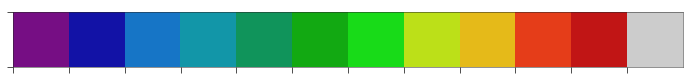

In [23]:
outbreak_palette = sns.color_palette('spectral', n_colors=len(outbreak_labels), desat=0.8)
#add a final colour for wt - see what this looks like
outbreak_palette.append((0.8, 0.8, 0.8))
#check
sns.palplot(outbreak_palette)

In [24]:
df_pops

,query,latitude,longitude,n_haps
pop,,,,
AOM,"population == ""AOM""",-8.821000,13.291000,120
BFM,"population == ""BFM""",11.221609,-4.457739,138
BFS,"population == ""BFS""",11.193630,-4.376556,162
GNS,"population == ""GNS""",8.887097,-9.675065,62
CMS,"population == ""CMS""",4.937851,13.936844,550
CMS_savanna,"population == ""CMS"" and (region == ""Gado-Badze...",5.747000,14.442000,182
CMS_transition,"population == ""CMS"" and region == ""Daiguene""",4.777000,13.844000,166
CMS_forest,"population == ""CMS"" and region == ""Mayos""",4.341000,13.558000,202
GAS,"population == ""GAS""",0.384000,9.455000,112


In [25]:
def make_df_lonlat():
    global df_lonlat
    df_lonlat = df_pops[['latitude', 'longitude']].copy()
    df_lonlat['offset_latitude'] = np.zeros(len(df_lonlat))
    df_lonlat['offset_longitude'] = np.zeros(len(df_lonlat))
    df_lonlat.loc['BFS'].offset_latitude = 2
    df_lonlat.loc['BFS'].offset_longitude = 2
    df_lonlat.loc['BFM'].offset_latitude = 2
    df_lonlat.loc['BFM'].offset_longitude = -2
    df_lonlat.loc['CMS_savanna'].offset_latitude = 3.5
    df_lonlat.loc['CMS_savanna'].offset_longitude = 0.5
    df_lonlat.loc['CMS_transition'].offset_latitude = 0.5
    df_lonlat.loc['CMS_transition'].offset_longitude = 3
    df_lonlat.loc['CMS_forest'].offset_latitude = -3
    df_lonlat.loc['CMS_forest'].offset_longitude = 1
    df_lonlat.loc['GAS'].offset_latitude = .5
    df_lonlat.loc['GAS'].offset_longitude = -3

make_df_lonlat()
df_lonlat

,latitude,longitude,offset_latitude,offset_longitude
pop,,,,
AOM,-8.821000,13.291000,0.0,0.0
BFM,11.221609,-4.457739,2.0,-2.0
BFS,11.193630,-4.376556,2.0,2.0
GNS,8.887097,-9.675065,0.0,0.0
CMS,4.937851,13.936844,0.0,0.0
CMS_savanna,5.747000,14.442000,3.5,0.5
CMS_transition,4.777000,13.844000,0.5,3.0
CMS_forest,4.341000,13.558000,-3.0,1.0
GAS,0.384000,9.455000,0.5,-3.0


In [26]:
#for legend
outbreak_colors = {l: c for l, c in zip(outbreak_labels + ['susceptible'], outbreak_palette)}
outbreak_colors

{'F1': (0.46548117647058823, 0.057645882352941213, 0.51881294117647059),
 'F2': (0.072552352941176457, 0.072552352941176457, 0.65297117647058822),
 'F3': (0.086670000000000025, 0.46212098039215632, 0.78003),
 'F4': (0.073336666666666606, 0.5889099999999996, 0.66003000000000012),
 'F5': (0.064577450980392137, 0.58119705882352946, 0.35736960784313776),
 'L1': (0.073853137254901946, 0.66467823529411763, 0.073853137254901946),
 'L2': (0.095818039215686213, 0.86236235294117658, 0.095818039215686213),
 'S1': (0.73775000000000035, 0.87999000000000005, 0.097776666666666623),
 'S2': (0.90000000000000002, 0.73058823529411765, 0.099999999999999978),
 'S3': (0.90000000000000002, 0.24117647058823533, 0.099999999999999978),
 'S4/5': (0.75884294117647066, 0.084315882352941185, 0.084315882352941185),
 'susceptible': (0.8, 0.8, 0.8)}

In [27]:
df_lonlat.loc[['BFS', 'BFM']]

,latitude,longitude,offset_latitude,offset_longitude
pop,,,,
BFS,11.193630,-4.376556,2.0,2.0
BFM,11.221609,-4.457739,2.0,-2.0


In [28]:
pops_cms_whole = [p for p in df_pops.index if p not in {'CMS_savanna', 'CMS_transition', 'CMS_forest'}]
pops_cms_whole

['AOM', 'BFM', 'BFS', 'GNS', 'CMS', 'GAS', 'UGS', 'KES', 'GWA']

In [29]:
pops_cms_breakdown = [p for p in df_pops.index if p != 'CMS']
pops_cms_breakdown

['AOM',
 'BFM',
 'BFS',
 'GNS',
 'CMS_savanna',
 'CMS_transition',
 'CMS_forest',
 'GAS',
 'UGS',
 'KES',
 'GWA']

In [73]:
plt.text?

In [74]:
plt.Rectangle?

In [77]:
def plot_map(pops, fn=None, dpi=150):

    #our frame
    extent_lonlat = (-20, 45, -13, 20)

    #plot
    subplot_kw = dict(projection=crs_lonlat)
    fig, ax = plt.subplots(figsize=(7, 7), dpi=120, subplot_kw=subplot_kw)
    ax.coastlines(resolution='50m', linewidth=.2, zorder=1)
    ax.stock_img()
    ax.add_feature(cfeature.BORDERS, lw=.6, zorder=4)
    ax.add_feature(cfeature.LAKES)
    #ax.margins(0)

    #add pies
    for pop, row in df_lonlat.loc[pops].iterrows():
        freqs = df_freqs.loc[pop]
        ratios = np.asarray([freqs[k]/freqs['total'] for k in (outbreak_labels + ['susceptible'])])
        # wedgeprops is used here just to pass the zorder command
        center = (row.longitude + row.offset_longitude, row.latitude + row.offset_latitude)
        radius = np.sqrt(df_freqs.loc[pop].total * .02)
        ax.pie(ratios, wedgeprops=dict(zorder=7), colors=outbreak_palette, 
               center=center, radius=radius, shadow=True)
        ax.add_patch(plt.Circle(xy=center, radius=radius, facecolor='none', edgecolor='k', zorder=8, lw=1))
        if row.offset_latitude > 0 or row.offset_longitude > 0:
            ax.plot([row.longitude, row.longitude + row.offset_longitude],
                    [row.latitude, row.latitude + row.offset_latitude], 'k-', lw=2)
        lbl = df_pops.loc[pop].short_label
        ax.text(center[0], center[1] + radius, lbl, ha='center', va='bottom', fontsize=8, fontweight='bold', 
                bbox=dict(edgecolor='w', facecolor='w', pad=1, alpha=.8, ), zorder=6)

    ax.set_extent(extent_lonlat, crs=crs_lonlat)

    handles = [mpl.patches.Patch(facecolor=v, edgecolor='k', label=k) for k, v in sorted(outbreak_colors.items())]
    ax.legend(handles=handles, bbox_to_anchor=(1, 1), loc='upper left', title='Outbreak')

    #save
    if fn:
        fig.savefig(fn, jpeg_quality=100, dpi=dpi, bbox_inches='tight')
    

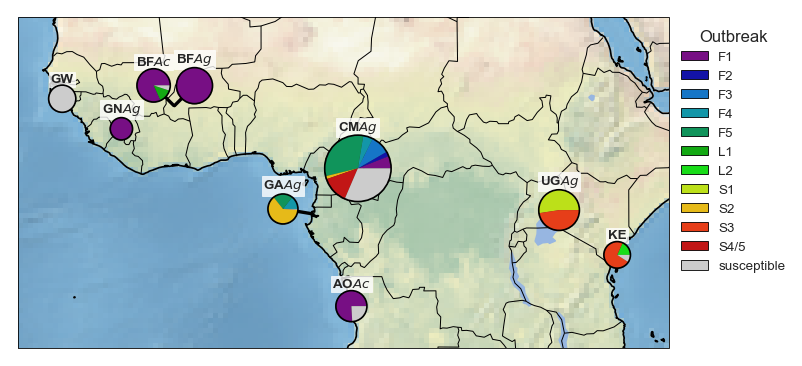

In [78]:
plot_map(pops=pops_cms_whole, fn='../artwork/outbreak_map_base.svg')

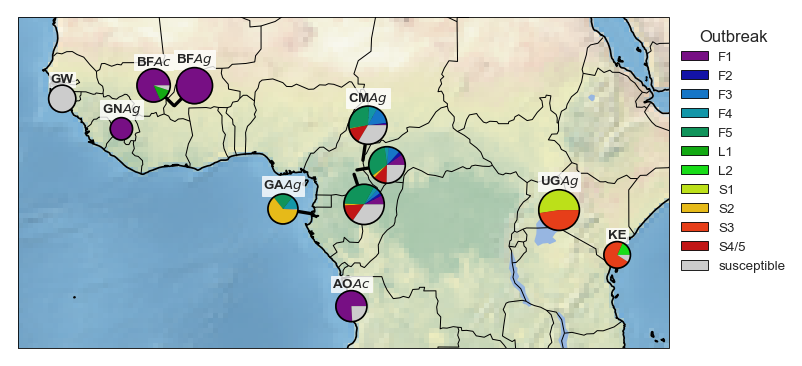

In [79]:
plot_map(pops=pops_cms_breakdown, fn='../artwork/outbreak_map_base_cms_breakdown.svg')